# ProtPeptigram

![Python Package](https://github.com/Sanpme66/ProtPeptigram/actions/workflows/python-package.yml/badge.svg)
[![PyPI version](https://badge.fury.io/py/protpeptigram.svg)](https://badge.fury.io/py/protpeptigram)
[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT)

## Visualization of Immunopeptides Mapped to Source Proteins Across Multiple Samples

ProtPeptigram provides a comprehensive visualization platform for mapping immunopeptides to their source proteins across different biological samples. This tool enables researchers to identify peptide coverage patterns, analyze density distributions, and compare peptide presentations between experimental conditions.


In [1]:
!pip install protpeptigram


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [20]:
!mkdir data
%cd data
!curl -L -O https://github.com/Sanpme66/ProtPeptigram/raw/main/data/JCI146771_Mouse_peptides_peaks_online.csv
!curl -L -O https://github.com/Sanpme66/ProtPeptigram/raw/main/data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta
%cd ..

/Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/example/data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1494k  100 1494k    0     0  1294k      0  0:00:01  0:00:01 --:--:-- 42.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11.1M  100 11.1M    0     0  7704k      0  0:00:01  0:00:01 --:--:-- 27.7M
/Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/example


[11:29:43] Loaded 17951 peptide entries from ./data/JCI146771_Mouse_peptides_peaks_online.csv   ]8;id=724238;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=373152;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#78\78]8;;\

           Found 6 intensity columns: Intensity_Hep_B10BR_28-14-8s, Intensity_Hep_B10BR_K9-178, ]8;id=729238;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=283682;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#93\93]8;;\
           Intensity_178-3 skin graft_28-14-8s, Intensity_178-3 skin graft_K9-178,                                 
           Intensity_178-3 spleen_K9-178, Intensity_178-3 spleen_Y-3                                               

           Loaded 34444 protein sequences from                                                 ]8;id=877503;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=254028;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#125\125]8;;\
           ./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta                                         

           Removed 692 contaminant entries                                                     ]8;id=24622;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=569702;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#269\269]8;;\

[11:29:59] Created formatted data with 9830 peptide-protein-sample combinations                ]8;id=45311;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=101380;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#333\333]8;;\

           PTMs were removed for position finding. Original peptides preserved in 'Peptide'    ]8;id=90224;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=512057;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#334\334]8;;\
           column, clean versions in 'CleanPeptide' column.                                                        

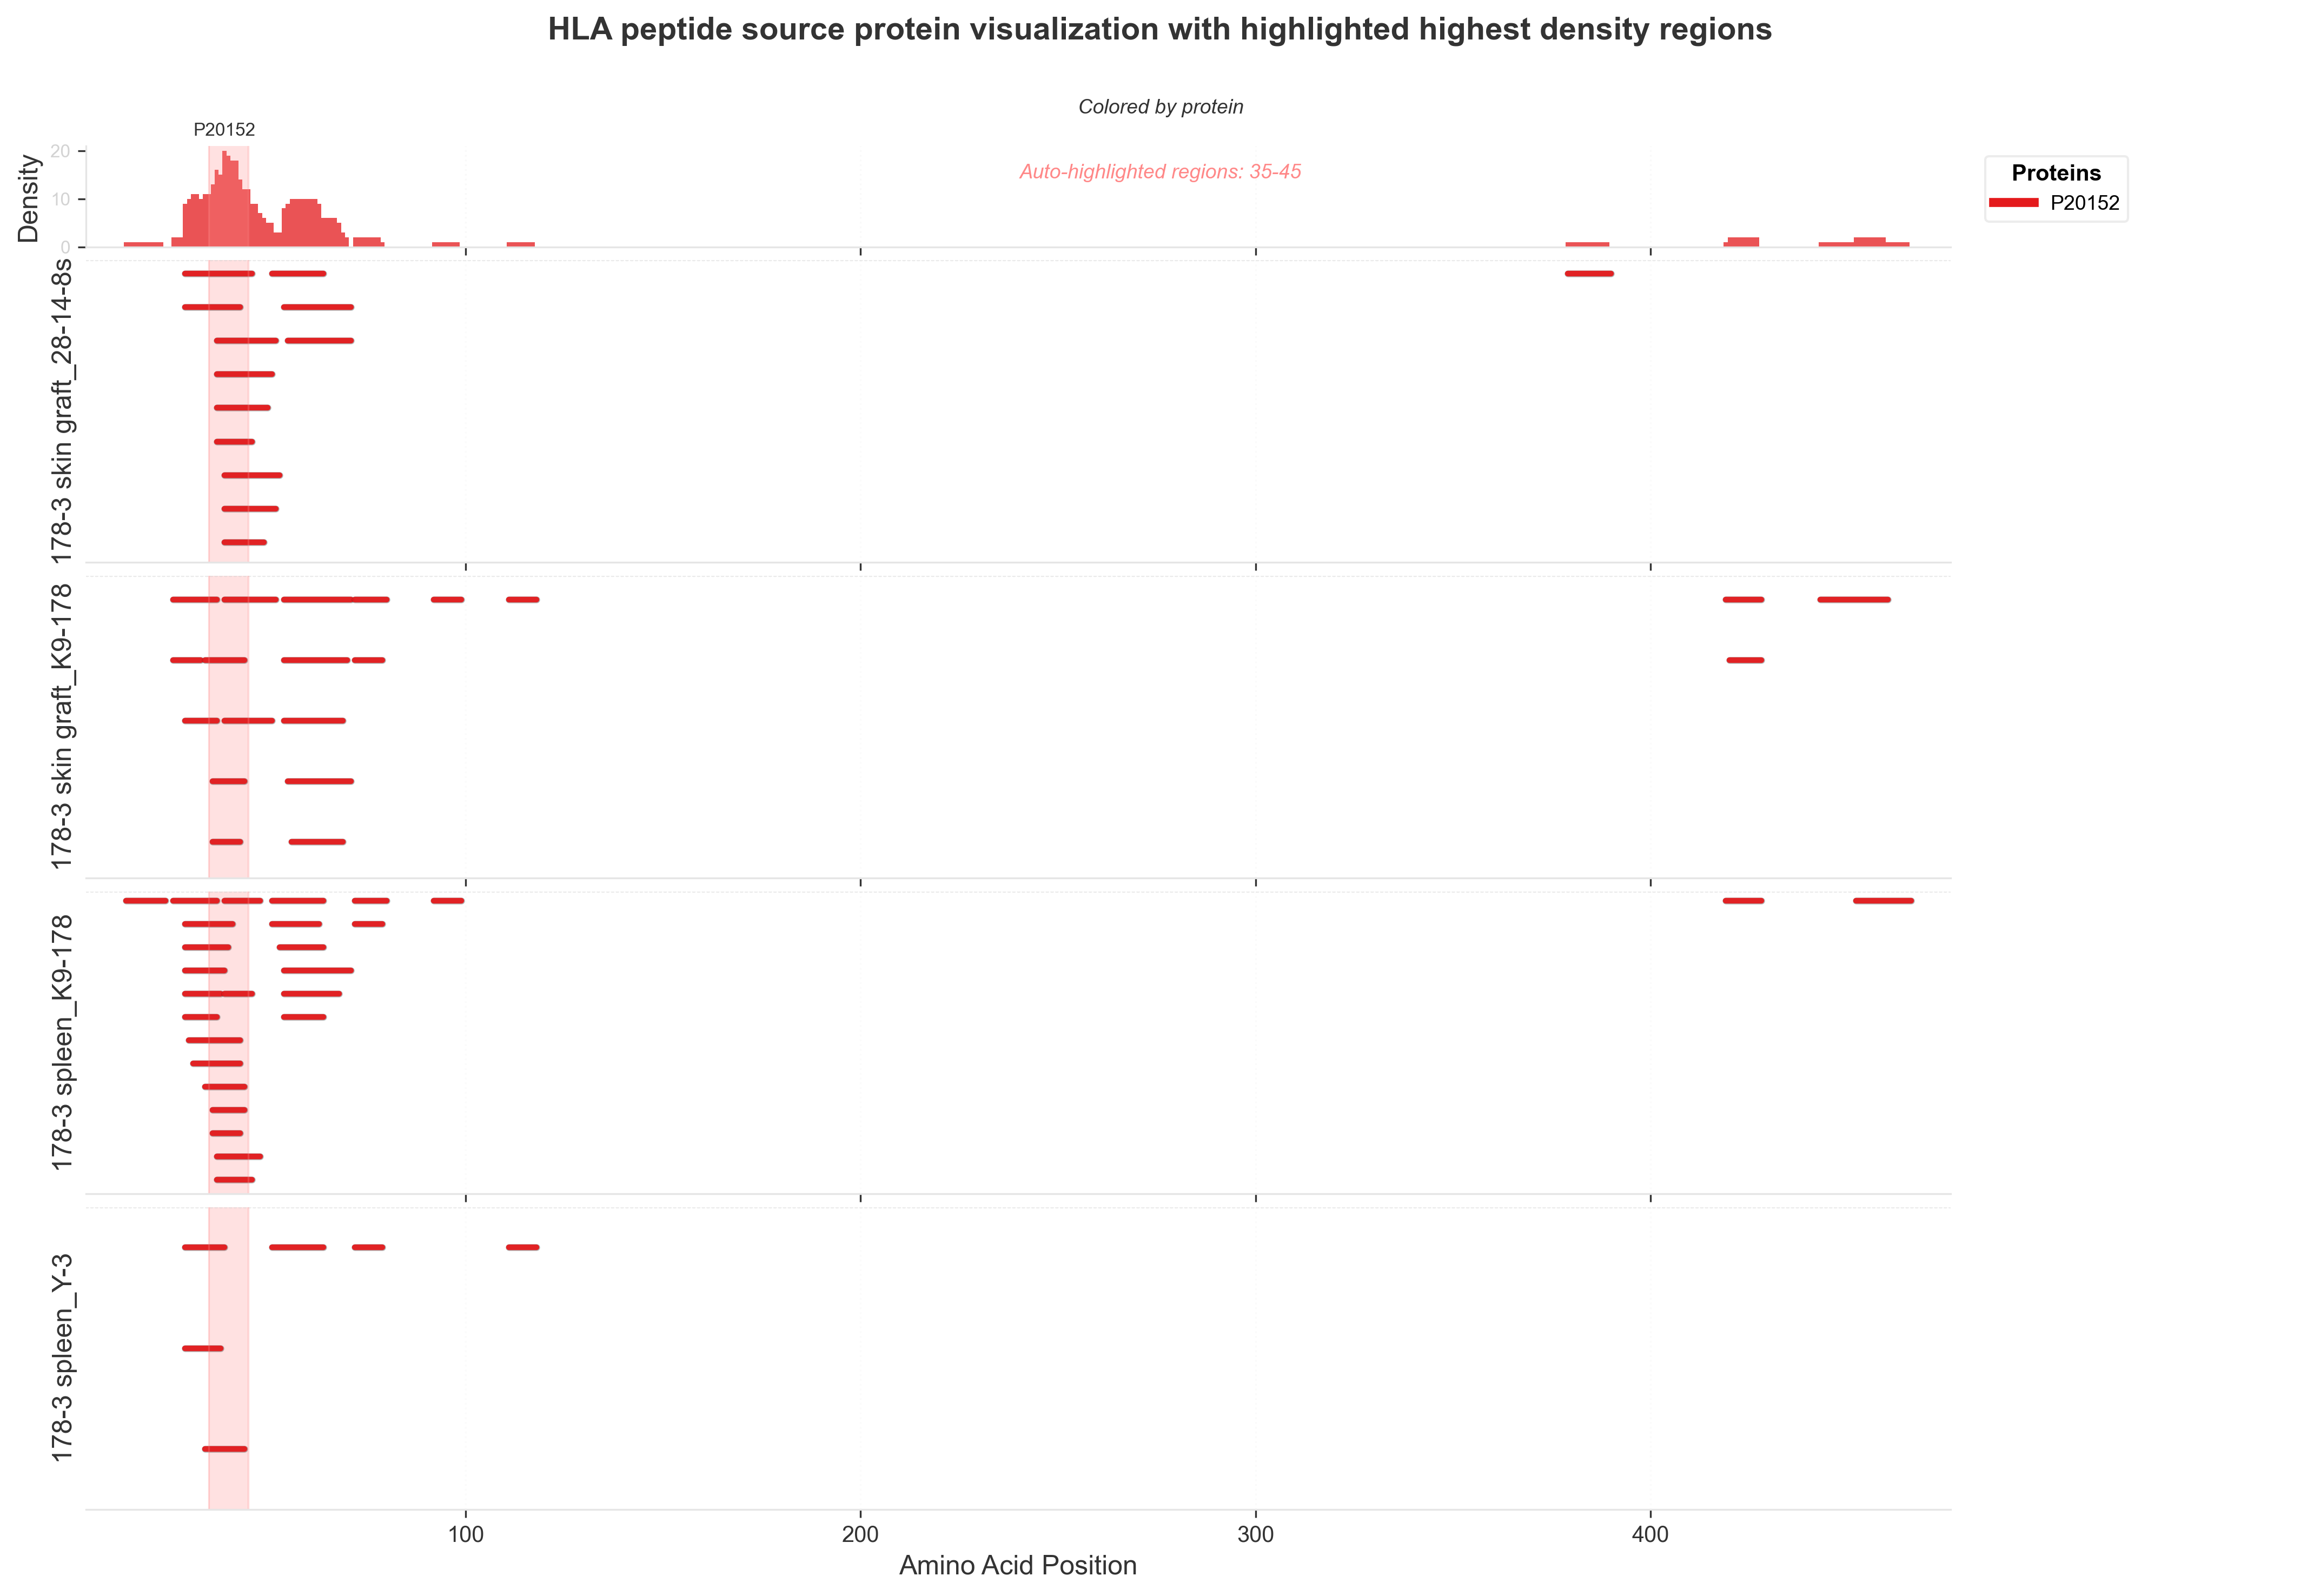

In [ ]:
from ProtPeptigram.DataProcessor import PeptideDataProcessor
from ProtPeptigram.viz import ImmunoViz

# Initialize data processor
processor = PeptideDataProcessor()

# Load data
processor.load_peaks_data("./data/JCI146771_Mouse_peptides_peaks_online.csv")
processor.load_protein_sequences("./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta")

# Process data
formatted_data = processor.filter_and_format_data(
    filter_contaminants=True,
    intensity_threshold=0,
    min_samples=1
)

# Create visualizations
viz = ImmunoViz(formatted_data)
fig, _ = viz.plot_peptigram(
    protein_ids=["P20152"],
    group_by="Sample",
    color_by="protein",
     protein_cmap="Set1",
    title="MHC peptide source protein visualisation with highlighted highest density regions",
)

# Save visualization
fig.savefig("protein_visualization.png", dpi=300, bbox_inches="tight")

## Without highlight

[10:25:40] Loaded 17951 peptide entries from ./data/JCI146771_Mouse_peptides_peaks_online.csv   ]8;id=222922;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=857740;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#78\78]8;;\

           Found 6 intensity columns: Intensity_Hep_B10BR_28-14-8s, Intensity_Hep_B10BR_K9-178, ]8;id=743071;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=588608;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#93\93]8;;\
           Intensity_178-3 skin graft_28-14-8s, Intensity_178-3 skin graft_K9-178,                                 
           Intensity_178-3 spleen_K9-178, Intensity_178-3 spleen_Y-3                                               

           Loaded 34444 protein sequences from                                                 ]8;id=908985;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=232227;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#125\125]8;;\
           ./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta                                         

           Removed 692 contaminant entries                                                     ]8;id=977917;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=217949;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#269\269]8;;\

           Removed 0 entries below intensity threshold of 0 or minimum sample count of 2       ]8;id=12128;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=869013;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#279\279]8;;\

[10:25:56] Created formatted data with 9830 peptide-protein-sample combinations                ]8;id=544933;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=523376;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#333\333]8;;\

           PTMs were removed for position finding. Original peptides preserved in 'Peptide'    ]8;id=373732;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=605140;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#334\334]8;;\
           column, clean versions in 'CleanPeptide' column.                                                        

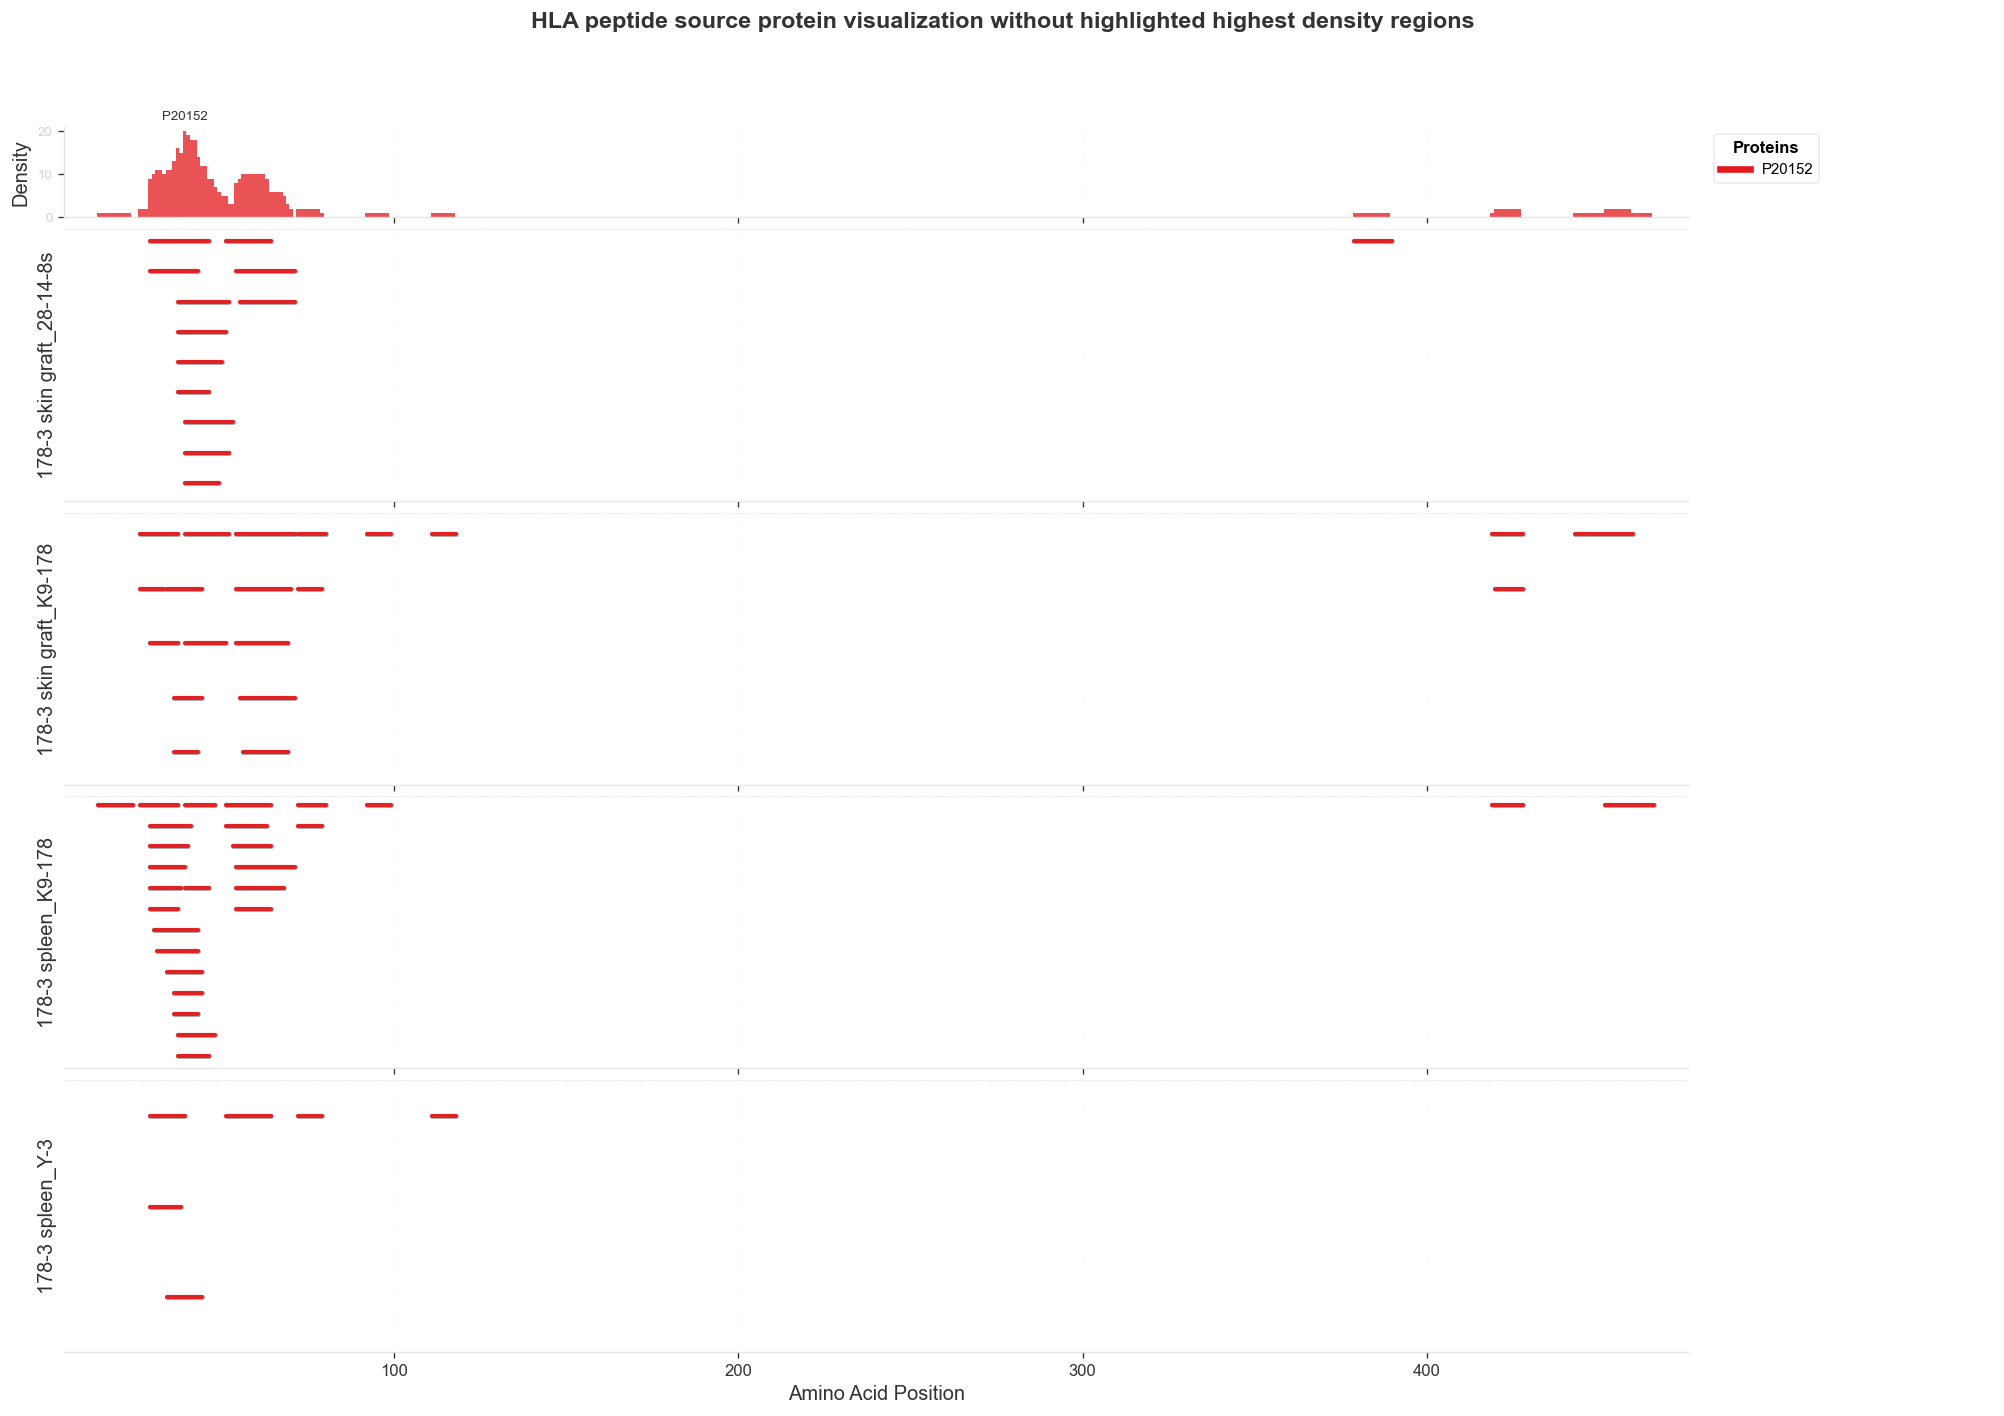

In [ ]:
import time
from ProtPeptigram.DataProcessor import PeptideDataProcessor
from ProtPeptigram.viz import ImmunoViz

# Initialize data processor
processor = PeptideDataProcessor()

# Load data
processor.load_peaks_data("./data/JCI146771_Mouse_peptides_peaks_online.csv")
processor.load_protein_sequences("./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta")

# Process data
formatted_data = processor.filter_and_format_data(
    filter_contaminants=True,
    intensity_threshold=0,
    min_samples=2
)

# Create visualizations
viz = ImmunoViz(formatted_data)
# fig, _ = viz.plot_peptigram(
#     protein_ids=["P20152"],
#     group_by="Sample",
#     color_by="protein",
#     title="HLA Peptide Visualization"
# )


fig, _ = viz.plot_peptigram(
    ['P20152'],#'P32261'], #['P20152','P32261','Q9QX47'],
    group_by='Sample',
    color_by='test',
    figsize=(14, 12),
    title="HLA peptide source protein visualization without highlighted highest density regions",
    color_by_protein_and_intensity=False,
    # Assign specific colormaps to each protein
    # intensity_cmaps=["Blues", "Reds", "Greens", "Purples"],
    protein_cmap="Set1",
    external_legend=True,
    highlight=False,
    auto_highlight=False,
    highlight_alpha=100,
    auto_highlight_threshold=0.8,
    auto_highlight_window=10,
    dpi=120
)


# # Save visualization
# fig.savefig("protein_visualization_without_h.png", dpi=300, bbox_inches="tight")



## Testing processing time

[11:01:57] Loaded 17951 peptide entries from ./data/JCI146771_Mouse_peptides_peaks_online.csv   ]8;id=329574;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=206020;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#78\78]8;;\

           Found 6 intensity columns: Intensity_Hep_B10BR_28-14-8s, Intensity_Hep_B10BR_K9-178, ]8;id=93318;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=712216;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#93\93]8;;\
           Intensity_178-3 skin graft_28-14-8s, Intensity_178-3 skin graft_K9-178,                                 
           Intensity_178-3 spleen_K9-178, Intensity_178-3 spleen_Y-3                                               

           Loaded 109414 protein sequences from                                                ]8;id=267392;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=692679;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#125\125]8;;\
           ./data/uniprotkb_proteome_UP000000589_2024_08_14.fasta                                                  

           Removed 692 contaminant entries                                                     ]8;id=998003;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=552862;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#269\269]8;;\

           Removed 0 entries below intensity threshold of 0 or minimum sample count of 2       ]8;id=886688;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=244226;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#279\279]8;;\

[11:02:16] Created formatted data with 9830 peptide-protein-sample combinations                ]8;id=857328;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=731890;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#333\333]8;;\

           PTMs were removed for position finding. Original peptides preserved in 'Peptide'    ]8;id=402081;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=867219;file:///Users/sanjay/Monash/Master_thesis/lab_work/Li_Lab/ProtPeptigram/ProtPeptigram/DataProcessor.py#334\334]8;;\
           column, clean versions in 'CleanPeptide' column.                                                        

Time taken to load data: 0.36588558299990837 seconds
Time taken to process & filter data: 18.935602458000176 seconds
Time taken to visualize data: 0.18470487499962474 seconds
System Information:
System: Darwin
Node Name: dyn-49-127-65-248.its.monash.edu.au
Release: 21.5.0
Version: Darwin Kernel Version 21.5.0: Tue Apr 26 21:08:29 PDT 2022; root:xnu-8020.121.3~4/RELEASE_ARM64_T8101
Machine: arm64
Processor: arm

CPU Information:
Physical cores: 8
Total cores: 8
CPU Frequency: 3204.00 MHz
CPU Usage: 20.0%

Memory Information:
Total: 8.00 GB
Available: 1.38 GB
Used: 2.50 GB
Percentage: 82.8%

Disk Information:
Total: 228.27 GB
Used: 14.20 GB
Free: 31.18 GB
Percentage: 31.3%


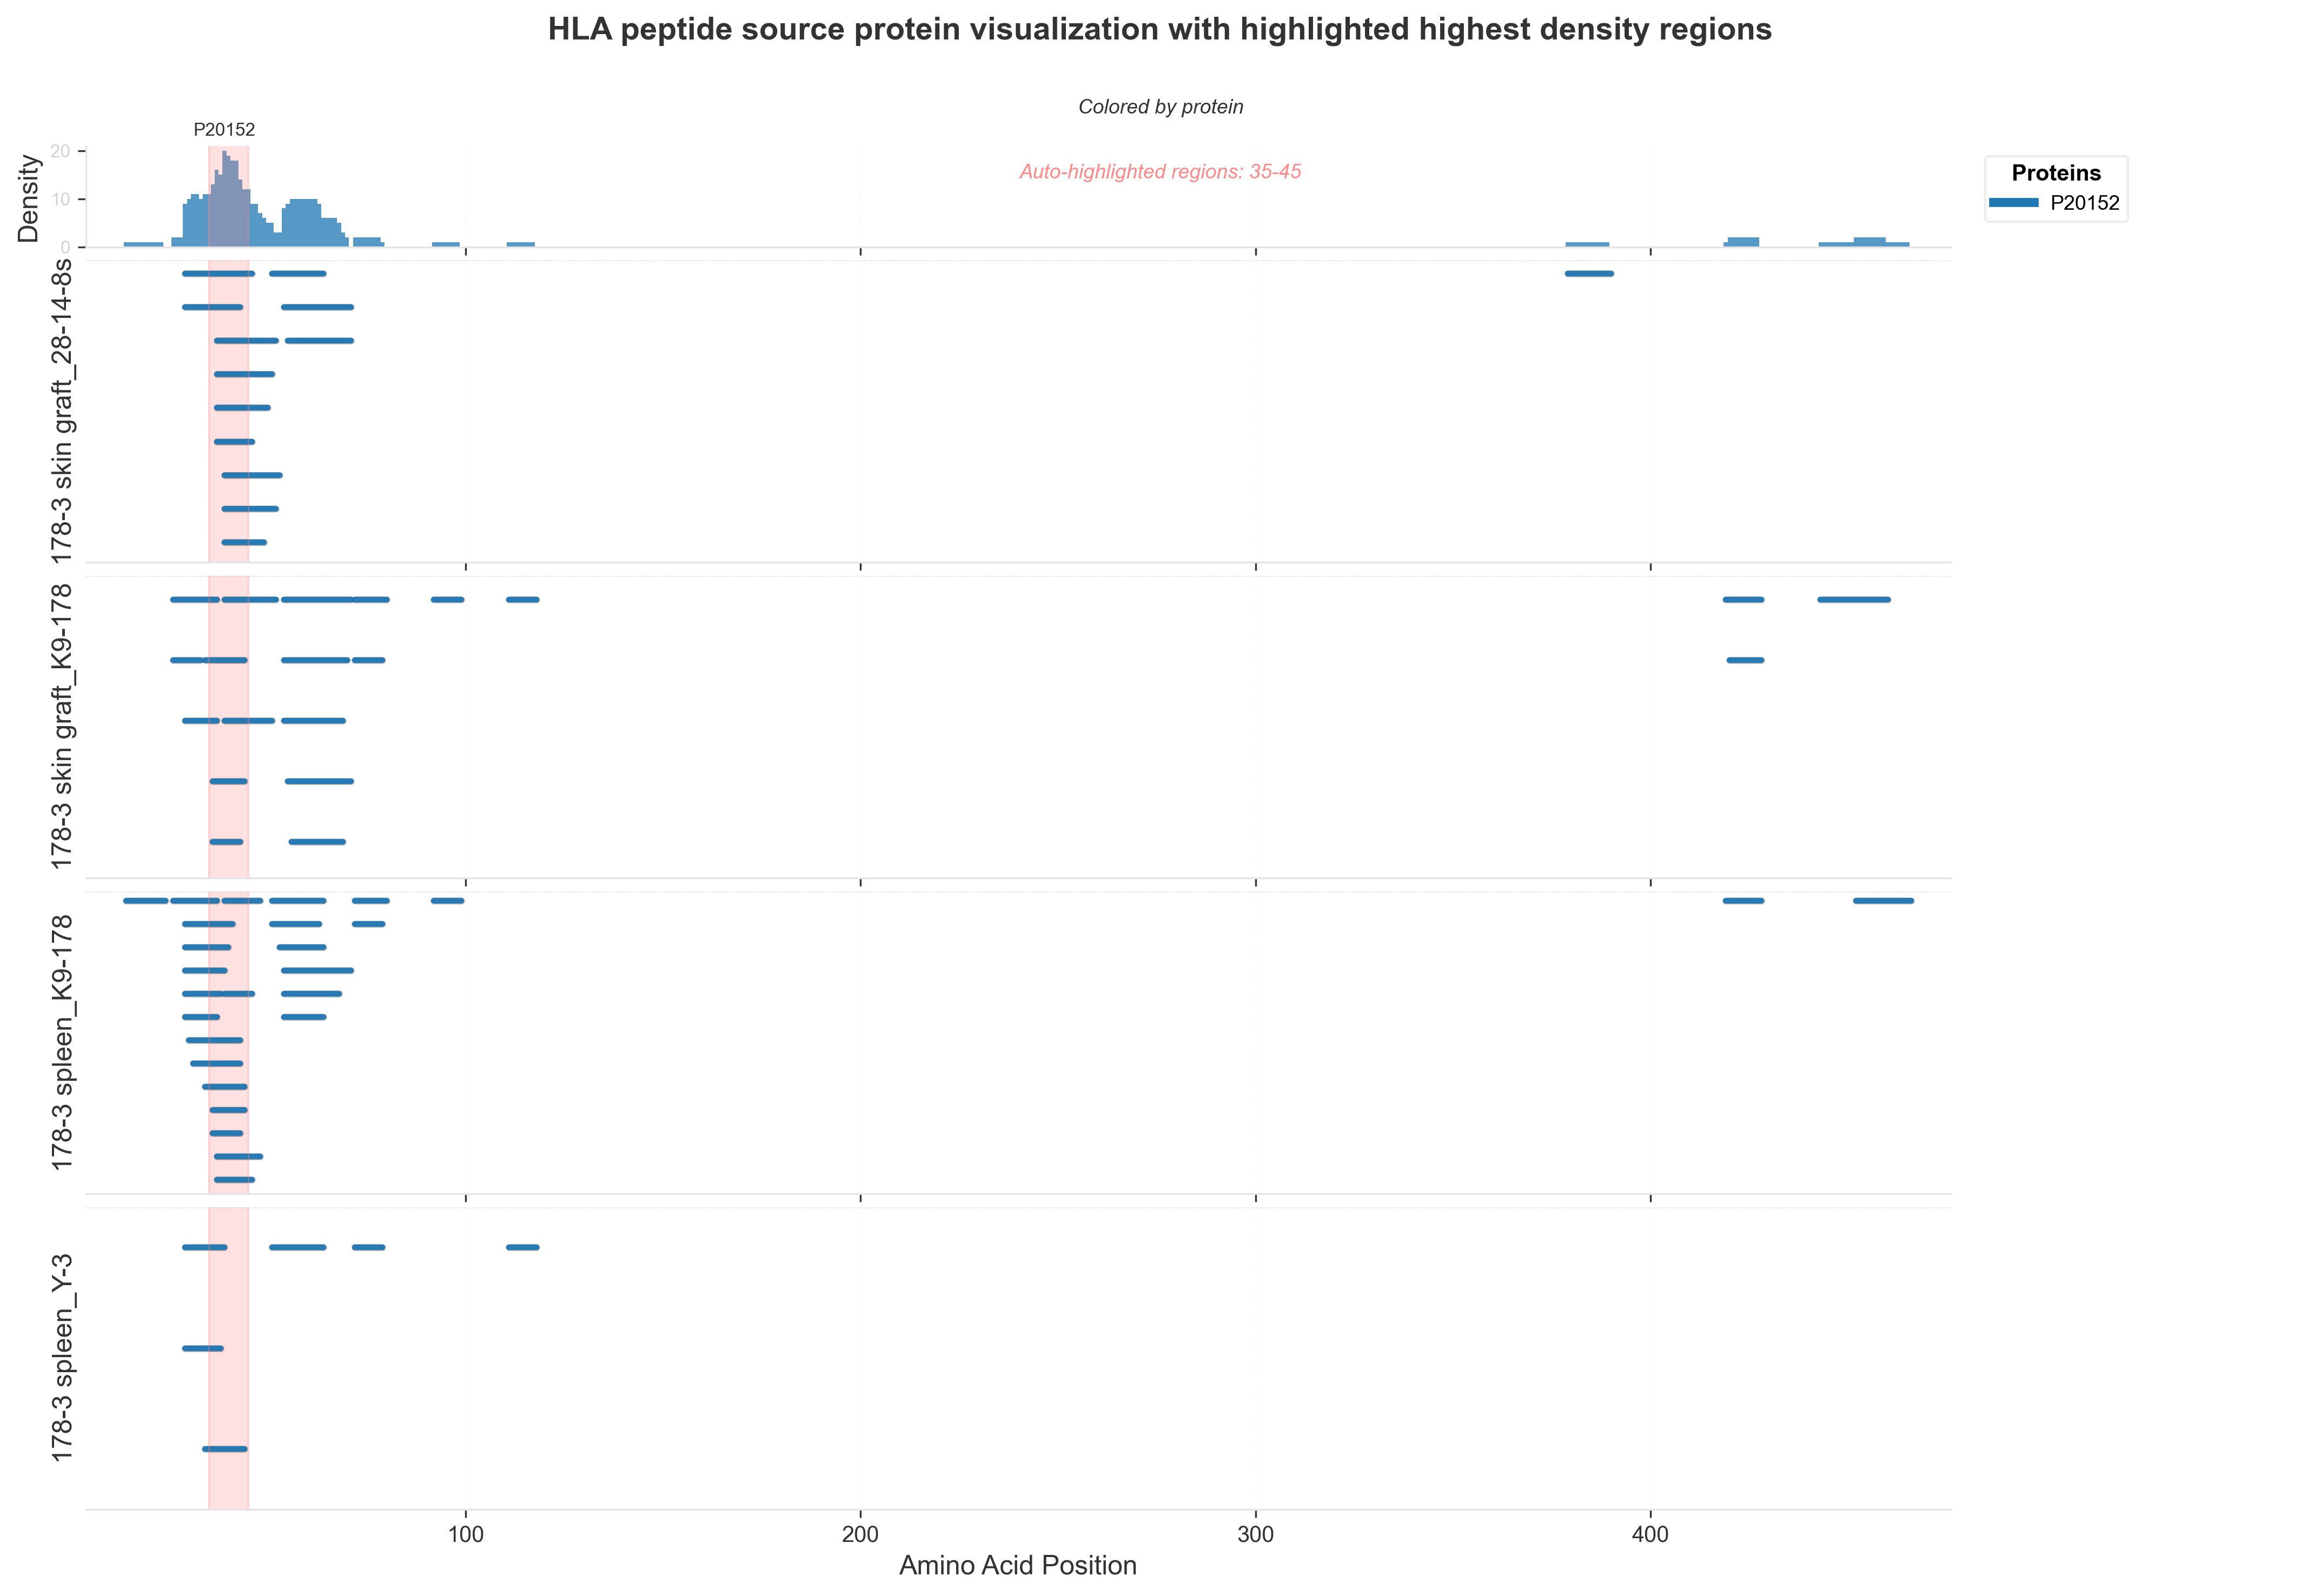

In [ ]:
import timeit
from ProtPeptigram.DataProcessor import PeptideDataProcessor
from ProtPeptigram.viz import ImmunoViz
import platform
import psutil

processor = PeptideDataProcessor()

def load_data():
    # Use the existing processor instance
    global processor
    processor.load_peaks_data("./data/JCI146771_Mouse_peptides_peaks_online.csv")
    # processor.load_protein_sequences("./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta")
    processor.load_protein_sequences("./data/uniprotkb_proteome_UP000000589_2024_08_14.fasta")



def process_data():
    # Process data
    formatted_data = processor.filter_and_format_data(
        filter_contaminants=True,
        intensity_threshold=0,
        min_samples=2
    )

def viz_data():
    # Create visualizations
    viz = ImmunoViz(formatted_data)
    fig, _ = viz.plot_peptigram(
        protein_ids=["P20152"],
        group_by="Sample",
        color_by="protein",
        title="HLA peptide source protein visualization with highlighted highest density regions",
    )
n_executions = 1
# Time to load data
time_taken = timeit.timeit(load_data, number=n_executions)
# Time to process data
data_load_time = timeit.timeit(process_data, number=n_executions)
# Time to visualize data
viz_data_time = timeit.timeit(viz_data, number=n_executions)
print(f"Time taken to load data: {time_taken} seconds")
print(f"Time taken to process & filter data: {data_load_time} seconds")
print(f"Time taken to visualize data: {viz_data_time} seconds")

# Print hardware and system details
print("System Information:")
print(f"System: {platform.system()}")
print(f"Node Name: {platform.node()}")
print(f"Release: {platform.release()}")
print(f"Version: {platform.version()}")
print(f"Machine: {platform.machine()}")
print(f"Processor: {platform.processor()}")

# Print CPU details
print("\nCPU Information:")
print(f"Physical cores: {psutil.cpu_count(logical=False)}")
print(f"Total cores: {psutil.cpu_count(logical=True)}")
print(f"CPU Frequency: {psutil.cpu_freq().max:.2f} MHz")
print(f"CPU Usage: {psutil.cpu_percent(interval=1)}%")

# Print memory details
virtual_memory = psutil.virtual_memory()
print("\nMemory Information:")
print(f"Total: {virtual_memory.total / (1024 ** 3):.2f} GB")
print(f"Available: {virtual_memory.available / (1024 ** 3):.2f} GB")
print(f"Used: {virtual_memory.used / (1024 ** 3):.2f} GB")
print(f"Percentage: {virtual_memory.percent}%")

# Print disk details
disk_usage = psutil.disk_usage('/')
print("\nDisk Information:")
print(f"Total: {disk_usage.total / (1024 ** 3):.2f} GB")
print(f"Used: {disk_usage.used / (1024 ** 3):.2f} GB")
print(f"Free: {disk_usage.free / (1024 ** 3):.2f} GB")
print(f"Percentage: {disk_usage.percent}%")